In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [17]:
# Provided functions
def get_ksize(sigma):
    return int(((sigma - 0.8)/0.15) + 2.0)

def get_gaussian_blur(img, ksize=0, sigma=5):
    if ksize == 0:
        ksize = get_ksize(sigma)
    sep_k = cv2.getGaussianKernel(ksize, sigma)
    return cv2.filter2D(img, -1, np.outer(sep_k, sep_k))

def ssr(img, sigma):
    img = img.astype('float32') / 255  # Convert to float and normalize
    blurred = get_gaussian_blur(img, sigma=sigma)
    return np.log10(img + 1e-6) - np.log10(blurred + 1e-6)

# MSR function
def msr(img, sigma_scales=[15, 80, 250]):
    msr_img = np.zeros(img.shape)
    for sigma in sigma_scales:
        msr_img += ssr(img, sigma)
    msr_img = msr_img / len(sigma_scales)
    msr_img = cv2.normalize(msr_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return msr_img

In [18]:

# Load an image
image_path = '/home/eaguiraud/Documents/34269_computer_imaging_and_spectroscopy/low_light_enhancement/images/dark_img_2.png'  # Update this path
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

In [19]:
# Apply MSR
msr_img = msr(img)


msr_img_uint8 = cv2.convertScaleAbs(msr_img)

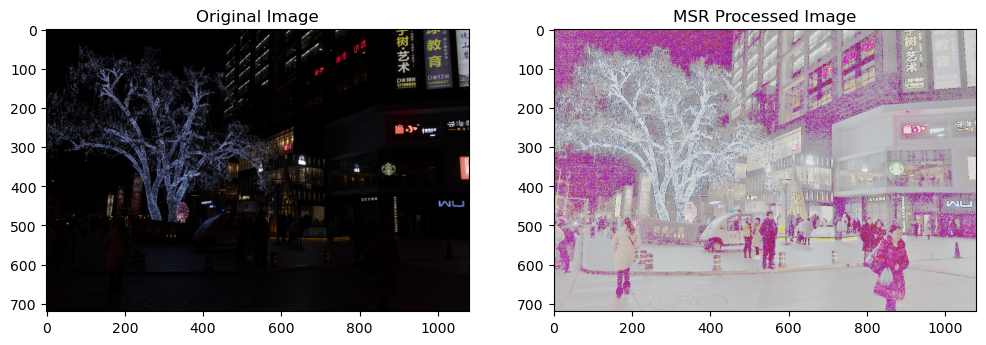

In [20]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(msr_img_uint8)
plt.title('MSR Processed Image')

plt.show()